<a href="https://colab.research.google.com/github/Russia31/dap-2024/blob/main/les08/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №8. Кластеризация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les08
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.2 (main, Mar 12 2024, 08:01:18) [GCC 12.2.0]
Numpy version: 2.1.0
Pandas version: 2.2.2
Matplotlib version: 3.9.2


1. Импортируйте модель данных "Ирисы Фишера".

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())


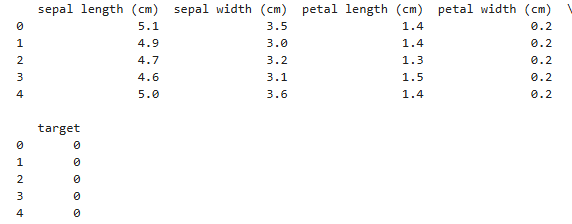

2. Выполните нормализацию данных

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

scaler = MinMaxScaler()

df_scaled = df.drop(columns=['target'])
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=iris.feature_names)

df_scaled['target'] = iris.target

print(df_scaled.head())


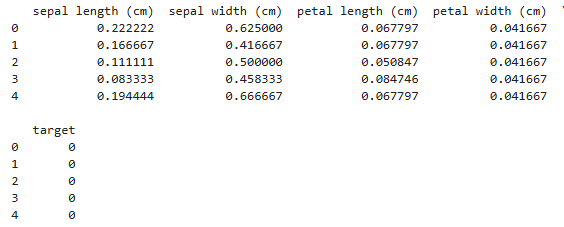

3. Постройте модель кластеризации используя алгоритм  DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

iris = load_iris()
X = iris.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 1], axis=0)

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('График расстояний до 2-го ближайшего соседа')
plt.xlabel('Образцы')
plt.ylabel('Расстояние')
plt.show()

eps = 0.3
dbscan = DBSCAN(eps=eps, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('Результаты кластеризации DBSCAN')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar()
plt.show()

print(f'Уникальные метки кластеров: {np.unique(clusters)}')


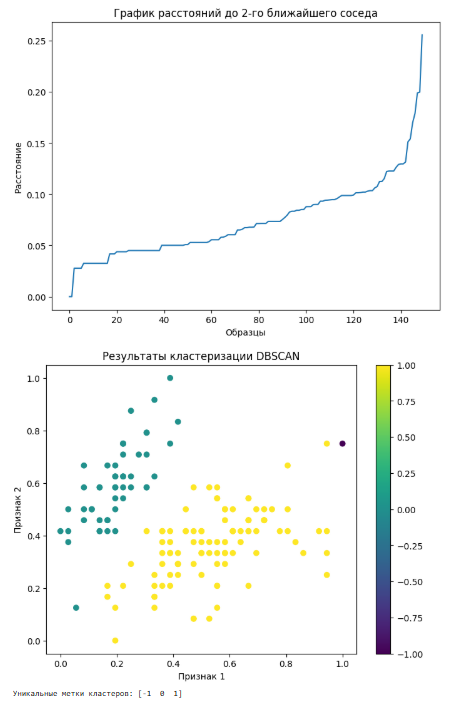

4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

eps = 0.3
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')

plt.title('Диаграмма рассеяния: Sepal Length vs Sepal Width')
plt.xlabel('Seplal Length (normalized)')
plt.ylabel('Seplal Width (normalized)')
plt.colorbar(label='Cluster')
plt.show()

print(f'Уникальные метки кластеров: {np.unique(clusters)}')


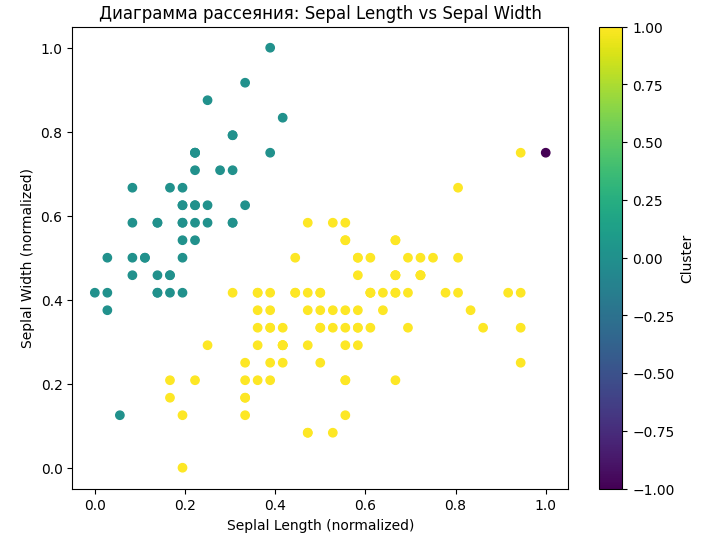

Вывод.

В ходе выполнения заданий мы применили алгоритм DBSCAN для кластеризации набора данных "Ирисы Фишера", нормализовав данные с помощью Min-Max Scaler. Мы выбрали оптимальные параметры `eps` и `min_samples`, используя метод ближайших соседей для оценки `eps`, и применили алгоритм для выявления кластеров и шума. Визуализация кластеров на диаграмме рассеяния показала, как DBSCAN разделяет данные на несколько кластеров, а также обнаруживает аномальные точки. Результаты подтверждают, что DBSCAN эффективен для кластеризации данных с шумом и произвольной формой кластеров, при этом правильный выбор параметров критически важен для качества кластеризации.

## Вопросы

1. В чем состоит задача кластеризации?
2. Для каких целей используется кластеризацияия?
3. Алгоритм кластеризации Ллойда.
4. Как выбрать количество кластеров для алгоритма K-средних
5. Алгоритм DBSCAN